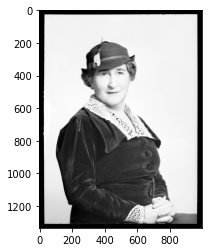

In [1]:
%matplotlib inline
import sys
from pathlib import Path

import matplotlib.pyplot as plt
import PIL


sys.path.insert(0, Path.cwd().parent)

from autocrop import Cropper

# Thumbnail of the original file
loc = "data/macbeth.jpg"
plt.imshow(plt.imread(loc), cmap='Greys_r')

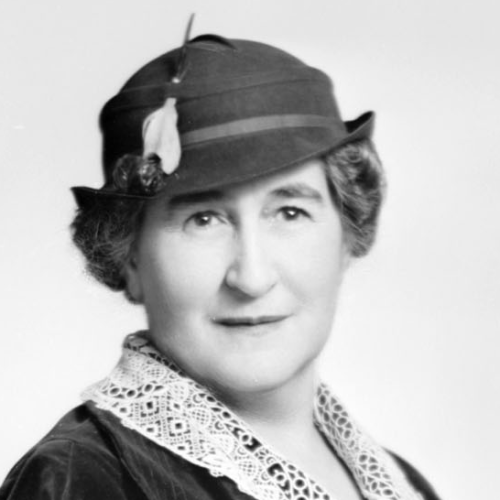

In [2]:
# Now let's crop it. Three lines.
c = Cropper()
img_array = c.crop(loc)
PIL.Image.fromarray(img_array)

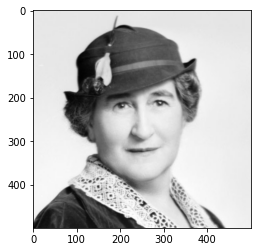

In [3]:
# We can also show the array from Matplotlib
c = Cropper()
img_array = c.crop(loc)
plt.imshow(img_array)
plt.show()

In [4]:
%%timeit
# 32ms on 2016 i7 5-series, 148ms on 10 yo MBP
img_array = c.crop(loc)

35.5 ms ± 627 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


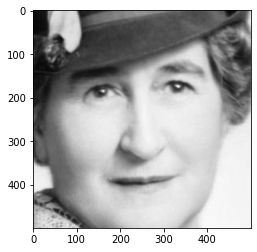

In [5]:
# You can play with the Cropper's arguments, e.g. face_percent
c = Cropper(face_percent=100)
plt.imshow(c.crop(loc))

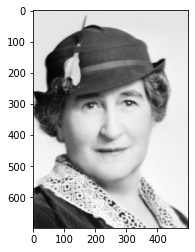

In [6]:
# This time, let's change the height
c = Cropper(height=700)
plt.imshow(c.crop(loc))

In [7]:
# Croppper.crop returns None if it can't find a face
noise = "data/noise.png"
assert c.crop(noise) is None

In [8]:
# Of course, the point is to use it on lots of files. Let's load some.
from glob import glob

faces = [f for f in glob("data/*") if not f.endswith("md")]
print(f"{len(faces)} images to test with.")

10 images to test with.


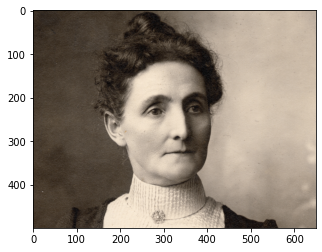

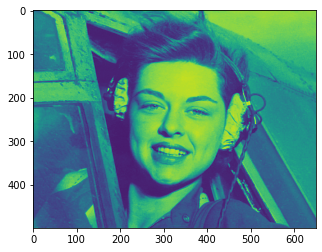

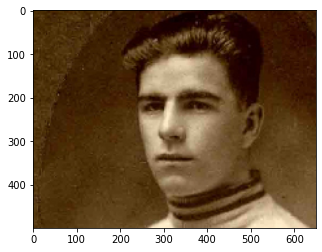

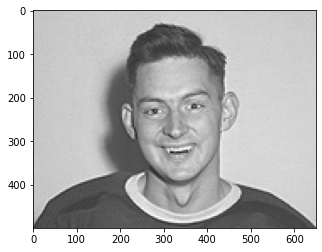

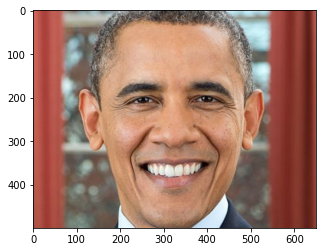

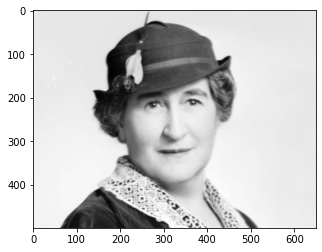

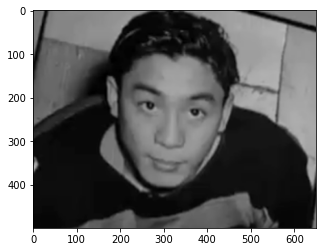

In [9]:
def plot_test_images(faces, cropper):
    """Given a list on filepaths, crops and plots them."""
    for face in faces:
        try:
            img_array = c.crop(face)
        except (AttributeError, TypeError):
            pass
        if img_array is not None:
            # We're using matplotlib here as it's easier to use in notebook
            plt.imshow(img_array)
            plt.show()


c = Cropper(width=650, height=500, face_percent=40)
plot_test_images(faces, c)

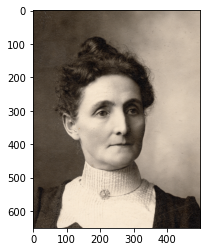

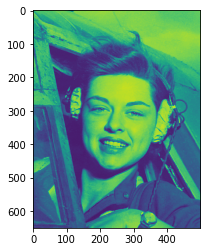

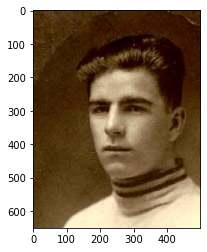

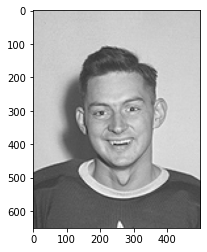

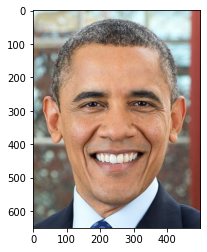

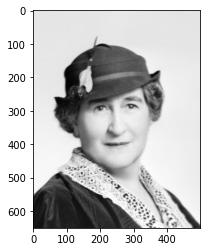

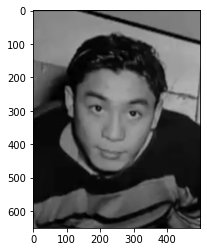

In [10]:
c = Cropper(height=650, width=500, face_percent=40)
plot_test_images(faces, c)

## `_crop_postions`
You can get the location of the detected face through this private method. This might be useful in cases where you want to take over the cropping, resizing, or any other transformation you wish the image to take on.

In [11]:
c = Cropper()
crop_positions = c._crop_positions
print(help(crop_positions))
crop_positions(500, 500, 50, 50, 100, 100)

Help on method _crop_positions in module autocrop.autocrop:

_crop_positions(imgh, imgw, x, y, w, h) method of autocrop.autocrop.Cropper instance
    Retuns the coordinates of the crop position centered
    around the detected face with extra margins. Tries to
    honor `self.face_percent` if possible, else uses the
    largest margins that comply with required aspect ratio
    given by `self.height` and `self.width`.
    
    Parameters:
    -----------
    imgh: int
        Height (px) of the image to be cropped
    imgw: int
        Width (px) of the image to be cropped
    x: int
        Leftmost coordinates of the detected face
    y: int
        Bottom-most coordinates of the detected face
    w: int
        Width of the detected face
    h: int
        Height of the detected face

None


[0, 200, 0, 200]